#NBA Analysis
Here we will look at NBA team data using Pandas

In [2]:
#Import matplotlib, numpy and get figures in notebook
from pandas import read_csv
import numpy as np
import matplotlib as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


We first read the team data into the variable "teams".  This data set includes several variables including:

* team names
* year
* field goals made
* field goals attempted
* free throws made
* free throws attempted
* offensive rebounds
* defensive rebounds
* etc...

Here we display the head of the data.


In [3]:
teams=read_csv('team_season.csv')
teams.columns

Index([u'﻿team', u'year', u'leag', u'o_fgm', u'o_fga', u'o_ftm', u'o_fta',
       u'o_oreb', u'o_dreb', u'o_reb', u'o_asts', u'o_pf', u'o_stl', u'o_to',
       u'o_blk', u'o_3pm', u'o_3pa', u'o_pts', u'd_fgm', u'd_fga', u'd_ftm',
       u'd_fta', u'd_oreb', u'd_dreb', u'd_reb', u'd_asts', u'd_pf', u'd_stl',
       u'd_to', u'd_blk', u'd_3pm', u'd_3pa', u'd_pts', u'pace', u'won',
       u'lost'],
      dtype='object')

Let us calculate three other variables of interest and add them into the data set.

The win percentage (Win%)

$win \%=\frac{Games\ Won}{Total\ Games}$

field goal percentage (FG%)

$FG \%=\frac{FGM}{FGA}$

field goal percentage (FG%)

$3pt \: FG \%=\frac{3 pt\: FGM}{ 3 pt\: FGA}$

In [4]:
#add in win percentage
teams['winperc']=(teams.won/(teams.won+teams.lost))
teams['FGperc']=(teams.o_fgm/(teams.o_fga))
teams['threeperc']=(teams.o_3pm /teams.o_3pa)
teams['twoperc']=(teams.o_fgm-teams.o_3pm)/(teams.o_fga-teams.o_3pa)

teams.head()

,﻿team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,...,d_3pm,d_3pa,d_pts,pace,won,lost,winperc,FGperc,threeperc,twoperc
0,BOS,1946.0,N,1397.0,5133.0,811.0,1375.0,0.0,0.0,0.0,...,0.0,0.0,3900.0,0.0,22.0,38.0,0.366667,0.272161,NaN,0.272161
1,CH1,1946.0,N,1879.0,6309.0,939.0,1550.0,0.0,0.0,0.0,...,0.0,0.0,4471.0,0.0,39.0,22.0,0.639344,0.297828,NaN,0.297828
2,CL1,1946.0,N,1674.0,5699.0,903.0,1428.0,0.0,0.0,0.0,...,0.0,0.0,4308.0,0.0,30.0,30.0,0.500000,0.293736,NaN,0.293736
3,DE1,1946.0,N,1437.0,5843.0,923.0,1494.0,0.0,0.0,0.0,...,0.0,0.0,3918.0,0.0,20.0,40.0,0.333333,0.245935,NaN,0.245935
4,NYK,1946.0,N,1465.0,5255.0,951.0,1438.0,0.0,0.0,0.0,...,0.0,0.0,3840.0,0.0,33.0,27.0,0.550000,0.278782,NaN,0.278782


Let use now calculate the average win% and FG% as a function of year.
To do this we need to index our data by year

In [5]:
newteams=teams.loc[teams['year']>=1979,:]
newteams.head()

,﻿team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,...,d_3pm,d_3pa,d_pts,pace,won,lost,winperc,FGperc,threeperc,twoperc
503,ATL,1979.0,N,3261.0,7027.0,2038.0,2645.0,1369.0,2406.0,3775.0,...,46.0,0.0,8334.0,101.1661,50.0,32.0,0.609756,0.464067,0.173333,0.467204
504,BOS,1979.0,N,3617.0,7387.0,1907.0,2449.0,1227.0,2457.0,3684.0,...,74.0,0.0,8664.0,105.9734,61.0,21.0,0.743902,0.489644,0.383886,0.496052
505,CHI,1979.0,N,3362.0,6943.0,2019.0,2592.0,1115.0,2465.0,3580.0,...,54.0,0.0,9035.0,104.5335,30.0,52.0,0.365854,0.484229,0.254545,0.493701
506,CLE,1979.0,N,3811.0,8041.0,1702.0,2205.0,1307.0,2381.0,3688.0,...,65.0,0.0,9332.0,109.1945,37.0,45.0,0.451220,0.473946,0.192513,0.480647
507,DEN,1979.0,N,3462.0,7470.0,1871.0,2539.0,1311.0,2524.0,3835.0,...,70.0,0.0,9240.0,106.5192,30.0,52.0,0.365854,0.463454,0.325490,0.468330


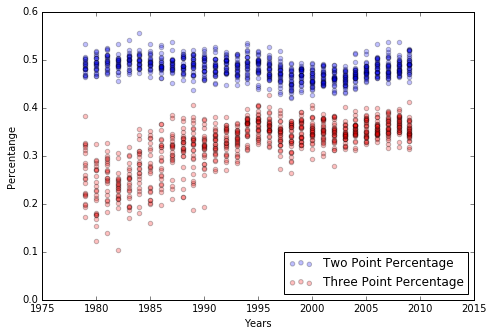

In [17]:
figure1=plt.figure()
axes1=figure1.add_axes([0.1, 0.1, 1, 1])
axes1.scatter(newteams['year'],newteams['twoperc'],alpha=0.25)
axes1.scatter(newteams['year'],newteams['threeperc'],c='red',alpha=0.25)
axes1.set_xlabel('Years')
axes1.set_ylabel('Percentange')
axes1.legend(['Two Point Percentage','Three Point Percentage'],loc=4)

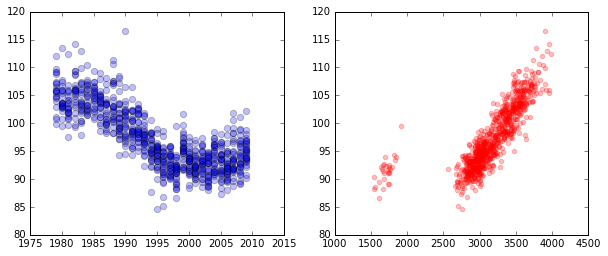

In [47]:
fig,axes=plt.subplots(1,2,figsize=(10,4))
axes[0].scatter(newteams['year'],newteams['pace'],s=40,alpha=0.25)
axes[1].scatter(newteams['o_fgm'],newteams['pace'],alpha=0.25,color='red')
#scatter(teams['winperc'],teams['o_3pm'],alpha=0.25)
#scatter(teams['winperc'],teams['threeperc'],c='red',alpha=0.25)

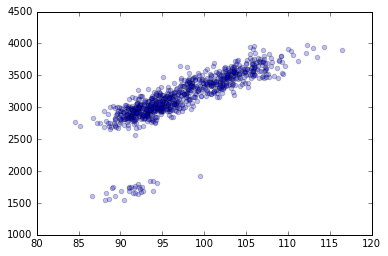

In [21]:
scatter(newteams['pace'],newteams['o_fgm'],alpha=0.25)

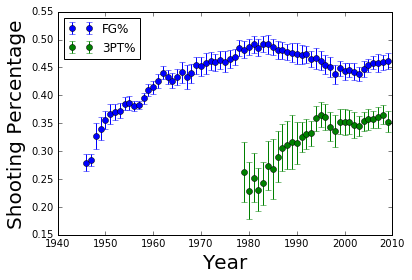

In [5]:
from pandas import isnull
years=(teams.year.unique())
years=years[~np.isnan(years)]
#years=years[~isnull(years)] Pandas Method
field_percentage=[]
three_percentage=[]
std_fgperc=[]
std_threperc=[]

for i in years:
    field_percentage.append(mean(teams.FGperc[teams.year==i]))
    std_fgperc.append(std(teams.FGperc[teams.year==i]))
    three_percentage.append(mean(teams.threeperc[teams.year==i]))
    std_threperc.append(std(teams.threeperc[teams.year==i]))
    
errorbar(years,field_percentage,yerr=std_fgperc,fmt='o');
errorbar(years,three_percentage,yerr=std_threperc,fmt='go');
legend(['FG%', '3PT%'],loc=2)
xlabel('Year',fontsize=20)
ylabel('Shooting Percentage',fontsize=20)

There appears to be a decrease in FG% after the introduction of 3 pointers.

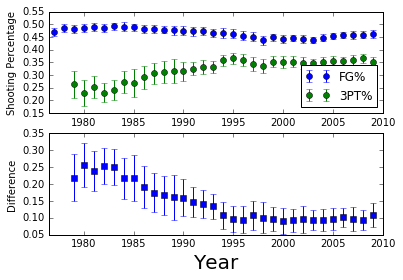

In [6]:
subplot(211)
errorbar(years,field_percentage,yerr=std_fgperc,fmt='o');
errorbar(years,three_percentage,yerr=std_threperc,fmt='go');
legend(['FG%', '3PT%'],loc=4)
ylabel('Shooting Percentage',fontsize=10)
xlim([1976.5,2010])
subplot(212)

errorbar(years,map(subtract,field_percentage,three_percentage),yerr=map(add,std_fgperc,std_threperc),fmt='s');
xlim([1976.5,2010])
ylabel('Difference',fontsize=10)
xlabel('Year',fontsize=20)

Is the decrease in FG% causial or simply stastical?

Could the advent of the three point shot be responsible for a change in FG%

Lets look at all the data and see what it says

Year Three pointers started 1979.0
Year leagues behavior changed 1992.0


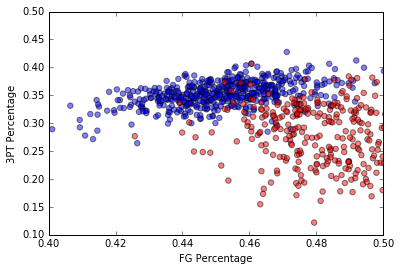

In [7]:
x=teams['FGperc']
y=teams['threeperc']
thr_point_year=min(teams.year[np.isfinite(teams.threeperc)])
print 'Year Three pointers started',thr_point_year
print 'Year leagues behavior changed',thr_point_year+13
scatter(x[teams['year']>thr_point_year+13],y[teams['year']>thr_point_year+13],s=30*teams['year']/max(teams['year']),alpha=0.5)
scatter(x[teams['year']<thr_point_year+13],y[teams['year']<thr_point_year+13],s=30*teams['year']/max(teams['year']),alpha=0.5,c='red')
xlabel('FG Percentage')
ylabel('3PT Percentage')
xlim([0.4,0.5]);
ylim([0.1,0.5]);

Now lets develop a model to test for what year a given FG% and 3P% are.  Maybe a logistic model would work here?

#Boston
Let us first consider only the Boston team

In [10]:
#Some Analysis for Boston
#assign boston variable
boston=teams[teams.iloc[:,0]=='BOS']
boston.head()

,﻿team,year,leag,o_fgm,o_fga,o_ftm,o_fta,o_oreb,o_dreb,o_reb,...,d_blk,d_3pm,d_3pa,d_pts,pace,won,lost,winperc,FGperc,threeperc
0,BOS,1946,N,1397,5133,811,1375,0,0,0,...,0,0,0,3900,0,22,38,0.366667,0.272161,NaN
12,BOS,1947,N,1241,4323,821,1246,0,0,0,...,0,0,0,3490,0,20,28,0.416667,0.287069,NaN
20,BOS,1948,N,1706,5483,1181,1856,0,0,0,...,0,0,0,4770,0,25,35,0.416667,0.311144,NaN
33,BOS,1949,N,1945,5756,1530,2163,0,0,0,...,0,0,0,5590,0,22,46,0.323529,0.337908,NaN
49,BOS,1950,N,2065,5607,1751,2415,0,0,3499,...,0,0,0,5900,0,39,30,0.565217,0.368290,NaN


Average boston games wins 46.4375 and average games lost 31.734375
Best winning season was 68.0 wins in 1972.0
Average win percentage 0.589966539087


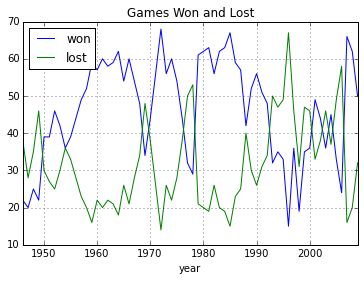

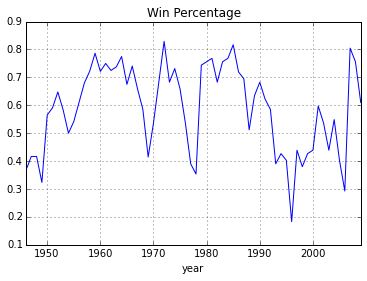

In [11]:
#Wins and Losses
print 'Average boston games wins',boston['won'].mean(),'and average games lost',boston['lost'].mean()
print 'Best winning season was',boston['won'].max(), 'wins in',boston.year[boston['won'].argmax()]
boston.plot(x='year',y=['won','lost'],title='Games Won and Lost');

#Win percentage
boston.plot(x='year',y='winperc',legend=False,title='Win Percentage');
print 'Average win percentage',boston.winperc.mean()


Index([u'﻿team', u'year', u'leag', u'o_fgm', u'o_fga', u'o_ftm', u'o_fta', u'o_oreb', u'o_dreb', u'o_reb', u'o_asts', u'o_pf', u'o_stl', u'o_to', u'o_blk', u'o_3pm', u'o_3pa', u'o_pts', u'd_fgm', u'd_fga', u'd_ftm', u'd_fta', u'd_oreb', u'd_dreb', u'd_reb', u'd_asts', u'd_pf', u'd_stl', u'd_to', u'd_blk', u'd_3pm', u'd_3pa', u'd_pts', u'pace', u'won', u'lost', u'winperc', u'FGperc', u'threeperc'], dtype='object')


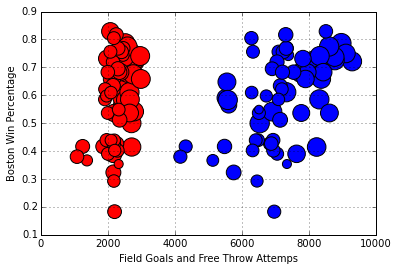

In [12]:
#Looking at some variables that effect Boston's win percentage
print boston.keys()
#teams.boxplot('won','year',figsize=(12,6),rot=90);
b_scat=boston.plot(kind='scatter', x=['o_fga','o_fta'], y=['winperc','winperc'], s=[boston['o_fgm']*.1,boston['o_ftm']*.1],c=['b','r']);
b_scat.set_ylabel('Boston Win Percentage')
b_scat.set_xlabel('Field Goals and Free Throw Attemps')

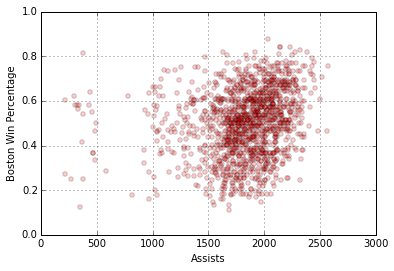

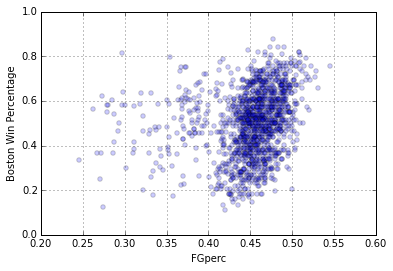

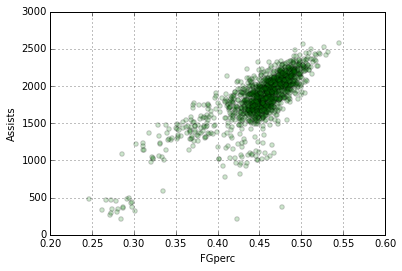

In [26]:
b_scat1=teams.plot(kind='scatter', x='o_asts', y='winperc',c='r',alpha=0.2);
b_scat1.set_ylabel('Boston Win Percentage')
b_scat1.set_xlabel('Assists')

b_scat2=teams.plot(kind='scatter', x='FGperc', y='winperc',c='b',alpha=0.2);
b_scat2.set_ylabel('Boston Win Percentage')
b_scat2.set_xlabel('FGperc')

b_scat3=teams.plot(kind='scatter', x='FGperc', y='o_asts',c='g',alpha=0.2);
b_scat3.set_ylabel('Assists')
b_scat3.set_xlabel('FGperc')

Do field goals made depend on field attemps
0.537004660654 -591.895681696 0.898755053691 0.0


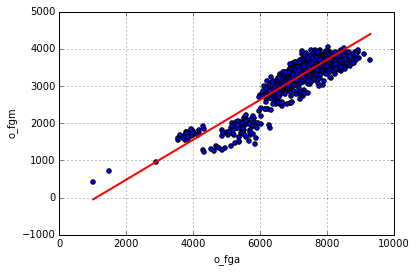

In [10]:
print 'Do field goals made depend on field attemps'
#Linear Model of Data
from scipy import stats
mask = ~np.isnan(teams.o_fga) & ~np.isnan(teams.o_fgm)
slope,intercept,r_value,p_value,std_err=stats.linregress(teams.o_fga[mask],teams.o_fgm[mask])
print slope,intercept,r_value,p_value
x=linspace(teams.o_fga.min(),teams.o_fga.max(),100)
teams.plot(kind='scatter',x='o_fga',y='o_fgm')
plot(x,x*slope+intercept,'r',linewidth=2)



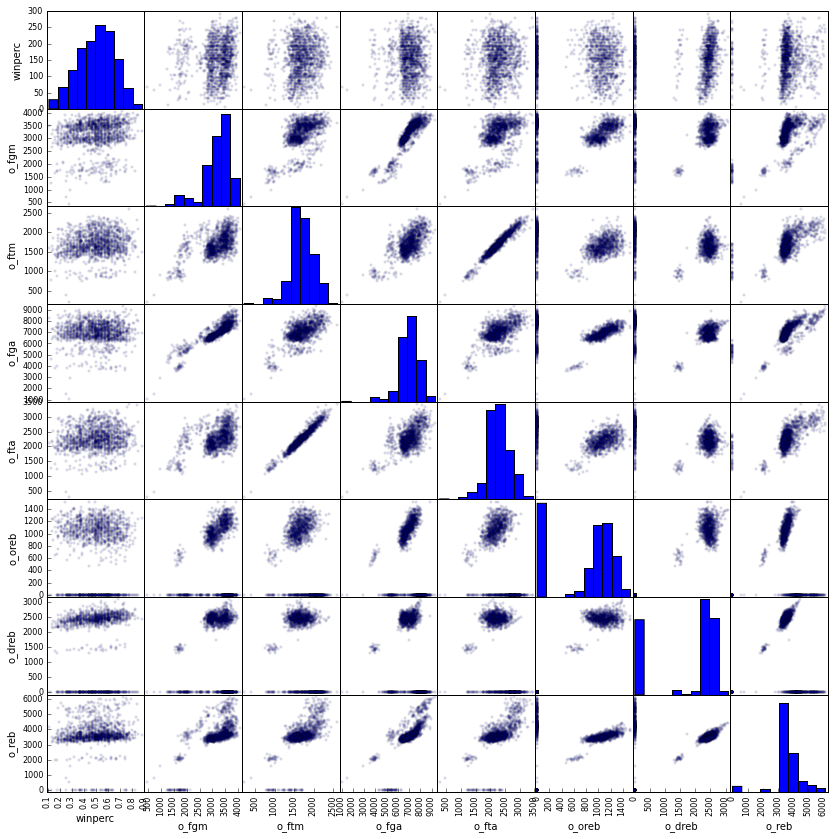

In [20]:
#Analyse of several paramaters
from pandas.tools.plotting import scatter_matrix
# offensive keys 'o_fgm','o_fga','o_ftm','o_fta','o_oreb','o_dreb','o_reb','o_asts','o_pf','o_stl','o_to','o_blk','o_3pm','o_3pa','o_pts'
scat = scatter_matrix(teams.loc[:,['winperc','o_fgm','o_ftm','o_fga','o_fta','o_oreb','o_dreb','o_reb']],alpha=0.1,figsize=(14,14), diagonal='hist')
#help(scatter_matrix)

In [ ]:
#Need to figure out ball possestions 